<a href="https://colab.research.google.com/github/Aveiro11/CVIP-Projects/blob/master/CVIP_Project_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir /.kaggle
!mv kaggle.json /.kaggle
!mv /.kaggle /root/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d iamprateek/store-transaction-data

  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 71.8MB/s]


In [4]:
!kaggle datasets download -d iamprateek/store-transaction-data

store-transaction-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip store-transaction-data.zip

Archive:  store-transaction-data.zip
  inflating: Hackathon_Ideal_Data.csv  
  inflating: Hackathon_Mapping_File.csv  
  inflating: Hackathon_Validation_Data.csv  
  inflating: Hackathon_Working_Data.csv  
  inflating: Sample Submission.csv   


In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **# Hackathon_Mapping_File:**

This file is provided to help understand the column names in the data set.

In [7]:
UMap=pd.read_csv("/content/Hackathon_Mapping_File.csv")
UMap.head(25)

,File Name,Column Name,Column Description
0,Hackathon_Ideal_Data,MONTH,"Month ID (M1, M2, M3)"
1,NaN,STORECODE,"STORE CODE (P1, P2, …, P10)"
2,NaN,QTY,Sales Unit
3,NaN,VALUE,Sales Value
4,NaN,GRP,Category
5,NaN,SGRP,Subcategory
6,NaN,SSGRP,Sub Sub Category
7,NaN,CMP,Company/Manufacturer
8,NaN,MBRD,Mother Brand
9,NaN,BRD,Brand


# **Hackathon_Working_Data:**
This contains data for selected stores which are missing and/or incomplete.

In [8]:
wd=pd.read_csv("/content/Hackathon_Working_Data.csv")
wd.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


General Overiew of the dataset and its attributes:

In [9]:
#shape of the dataset. rows= features, column=samples
wd.shape

(26985, 14)

In [10]:
#list of all attributes
wd.columns

Index(['MONTH', 'STORECODE', 'DAY', 'BILL_ID', 'BILL_AMT', 'QTY', 'VALUE',
       'PRICE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'],
      dtype='object')

In [11]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [12]:
print(f"Number of Month: {wd['MONTH'].nunique()}"),
print(f"Number of distinct STORE CODE: {wd['STORECODE'].nunique()}"),
print(f"Number of distinct bill id: {wd['BILL_ID'].nunique()}"),
print(f"Number of bill amount: {wd['BILL_AMT'].nunique()}"),
print(f"Number of distinct Category: {wd['GRP'].nunique()}"),
print(f"Number of distinct Subcategory: {wd['SGRP'].nunique()}"),
print(f"Number of Sub Sub Category: {wd['SSGRP'].nunique()}"),
print(f"Number of Company/Manufacturer: {wd['CMP'].nunique()}"),
print(f"Number of Mother Brand: {wd['MBRD'].nunique()}"),
print(f"Number of Brand: {wd['BRD'].nunique()}")

Number of Month: 3
Number of distinct STORE CODE: 10
Number of distinct bill id: 6424
Number of bill amount: 1453
Number of distinct Category: 80
Number of distinct Subcategory: 174
Number of Sub Sub Category: 232
Number of Company/Manufacturer: 354
Number of Mother Brand: 643
Number of Brand: 1315


In [13]:
#Searching if any null value exists
wd.isna().any()

MONTH        False
STORECODE    False
DAY          False
BILL_ID      False
BILL_AMT     False
QTY          False
VALUE        False
PRICE        False
GRP          False
SGRP         False
SSGRP        False
CMP          False
MBRD         False
BRD          False
dtype: bool

In [14]:
wd.isnull().sum()

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

In [15]:
#details about unit,value,price and bill amount
wd[['QTY', 'VALUE','PRICE','BILL_AMT']].describe()

,QTY,VALUE,PRICE,BILL_AMT
count,26985.000000,26985.000000,26985.000000,26985.000000
mean,4.105021,67.808551,52.812982,278.754206
std,95.666947,118.005978,84.987730,541.398504
min,0.500000,0.000000,0.000000,0.000000
25%,1.000000,10.000000,10.000000,40.000000
50%,1.000000,30.000000,22.000000,111.000000
75%,2.000000,80.000000,64.000000,280.000000
max,12000.000000,3150.000000,3150.000000,7292.000000


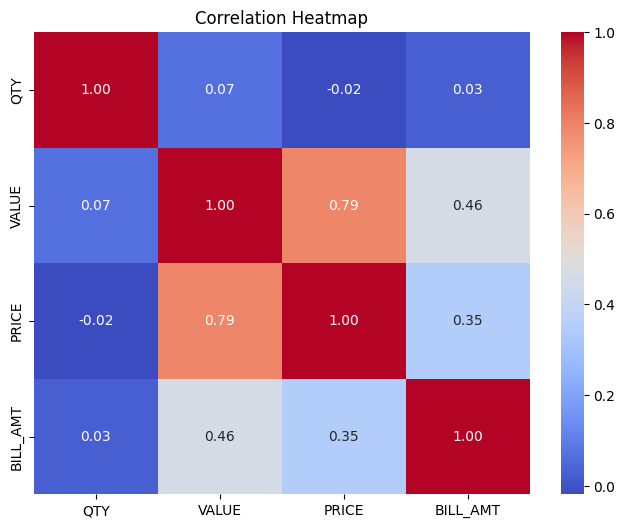

In [16]:
#showing how each value affects the other
correlation_matrix=wd[['QTY', 'VALUE','PRICE','BILL_AMT']].corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**From this correlation map we see that PRICE and QTY which means unit is negatively correlated, meaning if price increases people are disinterested to buy more units of that product.**

In [17]:
# Duplicated BILL_ID
duplicated_bill_ids = wd[wd.duplicated(subset=['BILL_ID'], keep=False)]

unique_duplicated_bill_ids = duplicated_bill_ids['BILL_ID'].unique()
print(f'The number of Bill ids that occured more than once: {len(unique_duplicated_bill_ids)}')

The number of Bill ids that occured more than once: 4705


We can see that there are bill ids which occured more than once. Meaning there can be same bill id for different purchase under different store. So we will try to find out how many same bill ids are there under different store:

In [18]:
# Group by BILL_ID and checking if there are multiple unique STORECODE values within each group
differing_storecodes = wd.groupby('BILL_ID')['STORECODE'].nunique()

# Filter the same BILL_ID values where differing STORECODE values occur
bill_ids_with_differing_storecodes = differing_storecodes[differing_storecodes > 1]
num_bill_ids_with_differing_storecodes = len(bill_ids_with_differing_storecodes)

# Print the count
print(f"Number of same Bill ids with different STORE CODE values: {num_bill_ids_with_differing_storecodes}")

Number of same Bill ids with different STORE CODE values: 3587


In [19]:
#Now lets figure out the name of 10 stores
for i in wd['STORECODE'].unique():
  print(i)

N1
N2
N3
N4
N5
N6
N7
N8
N9
N10


Top 5 Brands with most Units sold in 1st month for the store N1:

These are the most popular products

In [20]:
F1Qmonth = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N1')].nlargest(5, 'QTY')
F1Qmonth[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
2149,KISMI BAR,89.0,160.2,1.8,T3229,200.2,28
738,MAMY POKO PANTS STANDARD,22.0,198.0,9.0,T1041,198.0,9
800,COMFORT BLUE - MORNING FRESH,17.0,51.0,3.0,T1110,144.0,10
21,HEAD & SHOULDERS NEW,16.0,32.0,2.0,T402,32.0,4
369,DAIRY MILK,15.0,75.0,5.0,T723,75.0,7


Top 5 Brands with most Units sold in 2nd month for the store N1:

In [21]:
F2Qmonth = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N1')].nlargest(5, 'QTY')
F2Qmonth[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
7678,SUNDAY,12000.0,1116.0,0.09,T6293,2185.0,27
7717,TANG,6.0,30.0,5.00,T6576,30.0,30
7366,SURF EXCEL EASY WASH,5.0,50.0,10.00,T4170,50.0,5
7376,VIM EXTRA ANTI SMELL BAR,5.0,50.0,10.00,T4221,50.0,6
7403,ZOOPY,5.0,50.0,10.00,T4281,50.0,6


Top 5 Brands with most Units sold in 3rd month for the store N1:

In [22]:
F3Qmonth = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N1')].nlargest(5, 'QTY')
F3Qmonth[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
16584,SUNDAY,3000.0,279.0,0.09,T7825,669.0,13
17128,SUNDAY,3000.0,282.0,0.09,T8823,611.0,25
17170,SUNDAY,2000.0,188.0,0.09,T8892,188.0,26
17208,SUNDAY,2000.0,188.0,0.09,T8958,188.0,27
15889,SUNDAY,1000.0,94.0,0.09,T6908,196.0,3


Top 5 Brands with most values in 1st month for the store N1:

These are the most expensive products

In [23]:
F1Vmonth = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N1')].nlargest(5, 'VALUE')
F1Vmonth[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
2346,GOWARDHAN,1.0,490.0,490.0,T3437,490.0,30
1244,FORTUNE,4.0,480.0,120.0,T1489,480.0,13
751,DYNAMIX,2.0,470.0,235.0,T1050,528.0,9
944,SAGAR,1.0,425.0,425.0,T1252,570.0,11
2258,AASHIRVAAD WHOLE WHEAT,1.0,370.0,370.0,T3327,370.0,29


Top 5 Brands with most values in 2nd month for the store N1:

In [24]:
F2VmonthN1 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N1')].nlargest(5, 'VALUE')
F2VmonthN1[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
7678,SUNDAY,12000.0,1116.0,0.09,T6293,2185.0,27
7345,SAFFOLA GOLD,1.0,790.0,790.00,T4068,790.0,5
7361,FORTUNE,1.0,580.0,580.00,T4122,845.0,5
7673,AMUL,1.0,425.0,425.00,T6293,2185.0,27
7644,SUNDAY,4.0,372.0,93.00,T6120,660.0,25


Top 5 Brands with most values in 3rd month for the store N1:

In [25]:
F3VmonthN1 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N1')].nlargest(5, 'VALUE')
F3VmonthN1[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
15810,SAFFOLA GOLD,1.0,810.0,810.0,T6797,1406.4,2
16243,FORTUNE,1.0,580.0,580.0,T7410,580.0,9
15971,SUNDAY,1.0,495.0,495.0,T7042,495.0,4
17341,SUNDAY,1.0,495.0,495.0,T9120,809.0,29
17147,SAGAR,1.0,445.0,445.0,T8848,445.0,25


Here are stats for rest of the stores for top 5 brands sold most:

In [26]:
F1VmonthN2 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N2')].nlargest(5, 'VALUE')
F1VmonthN2[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
2516,SOCIETY LEAF,10.0,2200.0,220.0,T63,2721.0,5
2856,SOCIETY LEAF,10.0,2200.0,220.0,T413,3981.0,22
2784,SOCIETY LEAF,8.0,1760.0,220.0,T352,2290.0,1
2836,SOCIETY LEAF,8.0,1760.0,220.0,T400,2330.0,16
2435,GODREJ COOKLITE,7.0,1225.0,175.0,T10,1245.0,1


In [27]:
F2VmonthN2 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N2')].nlargest(5, 'VALUE')
F2VmonthN2[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
7975,SOCIETY LEAF,10.0,2200.0,220.0,T767,3777.0,27
8074,SOCIETY LEAF,10.0,2200.0,220.0,T875,3777.0,27
8089,SOCIETY LEAF,10.0,2200.0,220.0,T880,5151.0,31
8042,BROOKE BOND TAJ MAHAL,5.0,1400.0,280.0,T839,1520.0,3
8082,BROOKE BOND TAJ MAHAL,5.0,1400.0,280.0,T876,2832.0,27


In [28]:
F3VmonthN2 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N2')].nlargest(5, 'VALUE')
F3VmonthN2[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
17954,SOCIETY LEAF,8.0,1760.0,220.0,T1313,2330.0,3
17980,SOCIETY LEAF,8.0,1760.0,220.0,T1336,2330.0,17
17903,LEONARDO,1.0,1249.0,1249.0,T1266,1570.0,26
17987,SOCIETY LEAF,10.0,1100.0,110.0,T1349,1266.0,22
17509,SURF EXCEL MATIC FRONT LOAD,4.0,1048.0,262.0,T897,2375.0,3


In [29]:
F1VmonthN3 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N3')].nlargest(5, 'VALUE')
F1VmonthN3[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
3443,FORTUNE,2.0,1090.0,545.0,T495,1090.0,21
3455,KRISHNA,2.0,840.0,420.0,T503,840.0,21
3251,SAFFOLA GOLD,1.0,680.0,680.0,T352,680.0,15
3146,TIDE,1.0,675.0,675.0,T279,887.0,11
2894,SWEEKAR,5.0,575.0,115.0,T9,869.0,1


In [30]:
F2VmonthN3 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N3')].nlargest(5, 'VALUE')
F2VmonthN3[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
8571,NATURE FRESH ACTILITE,12.0,1116.0,93.0,T1182,1116.0,24
8769,SAFFOLA TASTY BLEND,1.0,1050.0,1050.0,T1341,1347.0,31
8431,ELEPHANT,30.0,900.0,30.0,T1039,1110.0,18
8674,AMUL,3.0,645.0,215.0,T1279,1565.0,29
8163,FORTUNE,1.0,560.0,560.0,T784,785.0,4


In [31]:
F3VmonthN3 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N3')].nlargest(5, 'VALUE')
F3VmonthN3[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
18010,AMUL,1.0,990.0,990.0,T1344,1145.0,1
18225,FORTUNE,1.0,700.0,700.0,T1781,700.0,17
18289,NUTRELA,1.0,540.0,540.0,T1992,540.0,26
18306,FORTUNE,1.0,540.0,540.0,T2032,978.0,27
18343,GOWARDHAN,1.0,520.0,520.0,T2110,1580.0,30


In [32]:
F1VmonthN4 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N4')].nlargest(5, 'VALUE')
F1VmonthN4[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
4482,GOOD KNIGHT ACTIV+,6.0,408.0,68.0,T383,625.00,29
4455,TIDE,3.0,306.0,102.0,T376,434.50,28
4529,WHEEL ACTIVE,30.0,285.0,9.5,T400,562.16,30
4564,HIMGANGE,1.0,280.0,280.0,T412,440.00,30
3739,PARACHUTE ADVANSED JASMINE,3.0,270.0,90.0,T31,779.00,2


In [33]:
F2VmonthN4 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N4')].nlargest(5, 'VALUE')
F2VmonthN4[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
8929,HIT LIME,2.0,532.0,266.0,T480,532.0,5
8928,HIT LIME,2.0,500.0,250.0,T479,500.0,5
9638,WHEEL GREEN,19.0,494.0,26.0,T846,494.0,29
9055,MYSORE SANDAL,2.0,400.0,200.0,T517,400.0,7
8832,GLACIER,4.0,360.0,90.0,T442,1026.0,2


In [34]:
F3VmonthN4 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N4')].nlargest(5, 'VALUE')
F3VmonthN4[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
19626,VIM,12.0,1200.0,100.0,T1386,1309.50,29
19649,L'OREAL CASTING,1.0,550.0,550.0,T1392,655.00,29
18547,PEARS OIL CLEAR,12.0,456.0,38.0,T941,460.75,3
18608,SOCIETY LEAF,2.0,430.0,215.0,T962,430.00,4
18782,INDULEKHA,1.0,421.0,421.0,T1046,421.00,9


In [35]:
F1VmonthN5 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N5')].nlargest(5, 'VALUE')
F1VmonthN5[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
4606,PEDIASURE COMPLETE,1.0,1130.0,1130.0,T96,1600.0,2
5034,KINDER JOY BOYS,24.0,960.0,40.0,T923,960.0,21
4691,WHISPER ULTRA SOFT,3.0,480.0,160.0,T217,588.0,4
4605,HORLICKS JUNIOR,1.0,400.0,400.0,T96,1600.0,2
4648,PROTINEX ORIGINAL,1.0,355.0,355.0,T159,478.0,3


In [36]:
F2VmonthN5 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N5')].nlargest(5, 'VALUE')
F2VmonthN5[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
11853,PEDIASURE,1.0,1140.0,1140.0,T2189,1235.0,19
11300,PEDIASURE,1.0,1130.0,1130.0,T1767,1160.0,10
12046,PEDIASURE COMPLETE,1.0,1100.0,1100.0,T2306,1436.0,21
10961,SRI SRI AYURVEDA,2.0,1000.0,500.0,T1448,1000.0,3
10973,FIGARO,1.0,870.0,870.0,T1460,870.0,4


In [37]:
F3VmonthN5 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N5')].nlargest(5, 'VALUE')
F3VmonthN5[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
23258,PEDIASURE,1.0,1140.0,1140.0,T4242,1140.0,28
21759,ENSURE,1.0,1025.0,1025.0,T3013,1025.0,5
22244,PAMPERS BABY DRY PANTS,1.0,825.0,825.0,T3395,825.0,12
22938,FIGARO,1.0,575.0,575.0,T3887,575.0,22
21433,WILD STONE EDGE,1.0,500.0,500.0,T2755,520.0,28


In [38]:
F1VmonthN6 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N6')].nlargest(5, 'VALUE')
F1VmonthN6[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
5277,NATURE FRESH ACTILITE,1.0,500.0,500.0,T343,540.0,27
5268,DETTOL ORIGINAL,2.0,400.0,200.0,T275,610.0,23
5275,EMAMI HEALTHY & TASTY,3.0,285.0,95.0,T338,425.0,26
5227,ARIEL COMPLETE,1.0,260.0,260.0,T34,416.0,2
5263,LIRIL,5.0,255.0,51.0,T264,385.0,22


In [39]:
F2VmonthN6 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N6')].nlargest(5, 'VALUE')
F2VmonthN6[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
12821,SAFFOLA GOLD,1.0,825.0,825.0,T896,825.0,25
12709,GOLD WINNER,1.0,530.0,530.0,T615,530.0,9
12622,SOCIETY LEAF,1.0,410.0,410.0,T450,440.0,1
12649,SAFFOLA TOTAL,1.0,380.0,380.0,T483,910.0,2
12691,LIZOL DISINFECT FLR CLNR,2.0,350.0,175.0,T588,350.0,8


In [40]:
F3VmonthN6 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N6')].nlargest(5, 'VALUE')
F3VmonthN6[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
24189,SURF EXCEL MATIC TOP LOAD,3.0,1287.0,429.0,T1580,1287.0,28
23644,SAFFOLA GOLD,1.0,825.0,825.0,T1163,825.0,6
24018,SAFFOLA GOLD,1.0,825.0,825.0,T1459,825.0,21
23567,FORTUNE,1.0,720.0,720.0,T1121,1045.0,4
23971,FORTUNE,1.0,600.0,600.0,T1439,734.0,21


In [41]:
F1VmonthN7 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N7')].nlargest(5, 'VALUE')
F1VmonthN7[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
5538,GUINEA,4.0,700.0,175.0,T294,719.0,5
6649,FORTUNE,1.0,685.0,685.0,T2280,685.0,28
6861,SAFFOLA TASTY BLEND,1.0,660.0,660.0,T2526,2048.0,8
6970,SAFFOLA TASTY BLEND,1.0,660.0,660.0,T2653,1293.0,25
6992,FORTUNE,1.0,600.0,600.0,T2669,652.0,28


In [42]:
F2VmonthN7 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N7')].nlargest(5, 'VALUE')
F2VmonthN7[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
15383,SUNDROP SUPERLITE ADVANCED,1.0,985.0,985.0,T5048,1724.5,27
15419,GUINEA,1.0,900.0,900.0,T5062,2150.0,30
13303,GUINEA,1.0,875.0,875.0,T3091,875.0,8
14119,DHARA,1.0,700.0,700.0,T3992,700.0,20
15113,SAFFOLA TASTY BLEND,1.0,660.0,660.0,T4867,1529.0,5


In [43]:
F3VmonthN7 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N7')].nlargest(5, 'VALUE')
F3VmonthN7[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
25408,FORTUNE,1.0,685.0,685.0,T7349,685.00,2
25556,FORTUNE,1.0,600.0,600.0,T7506,786.00,21
25420,FORTUNE,1.0,550.0,550.0,T7352,1569.50,2
25577,GEMINI,1.0,550.0,550.0,T7547,2029.49,28
25605,FORTUNE,1.0,550.0,550.0,T7560,630.00,29


In [44]:
F1VmonthN8 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N8')].nlargest(5, 'VALUE')
F1VmonthN8[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
7091,SAMRAT,4.0,1400.0,350.0,T211,4426.0,8
7093,AMUL,3.0,1335.0,445.0,T211,4426.0,8
7206,SAFFOLA GOLD,1.0,699.0,699.0,T562,1133.0,23
7232,SAFFOLA GOLD,1.0,699.0,699.0,T625,699.0,26
7092,FORTUNE,1.0,560.0,560.0,T211,4426.0,8


In [45]:
F2VmonthN8 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N8')].nlargest(5, 'VALUE')
F2VmonthN8[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
15448,SAFFOLA GOLD,1.0,699.0,699.0,T816,933.0,4
15587,GITS,7.0,560.0,80.0,T1063,1010.0,14
15660,EVERYDAY DAIRY WHITNER,3.0,528.0,176.0,T1193,1043.0,20
15588,TATA TETLEY,1.0,450.0,450.0,T1063,1010.0,14
15629,TATA TETLEY,1.0,450.0,450.0,T1102,875.0,17


In [46]:
F3VmonthN8 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N8')].nlargest(5, 'VALUE')
F3VmonthN8[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
25675,SAMRAT,8.0,2800.0,350.0,T1533,7292.0,4
25680,AMUL,6.0,2670.0,445.0,T1533,7292.0,4
25822,BRITANNIA,4.0,1020.0,255.0,T1735,1170.0,12
26110,SOCIETY LEAF,4.0,880.0,220.0,T2270,2023.0,3
26111,EVERYDAY DAIRY WHITNER,2.0,858.0,429.0,T2270,2023.0,3


In [47]:
F1VmonthN9 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N9')].nlargest(5, 'VALUE')
F1VmonthN9[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
10476,AMUL,10.0,2250.0,225.0,T454,2710.0,19
10458,SAGAR,1.0,2175.0,2175.0,T445,4515.0,31
10459,AASHIRVAAD WHOLE WHEAT,4.0,1680.0,420.0,T445,4515.0,31
10473,AMUL,4.0,1600.0,400.0,T452,2800.0,12
10469,TYPHOO,7.0,1365.0,195.0,T449,3739.0,4


In [48]:
F2VmonthN9 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N9')].nlargest(5, 'VALUE')
F2VmonthN9[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
19684,DEL MONTE,1.0,3150.0,3150.0,T464,4472.0,1
20108,AMUL,10.0,2250.0,225.0,T649,3912.0,13
20303,SAGAR,1.0,2175.0,2175.0,T818,2175.0,26
20344,COLOR NATURALS,11.0,1980.0,180.0,T839,3196.0,27
19935,AASHIRVAAD WHOLE WHEAT,4.0,1680.0,420.0,T576,1680.0,8


In [49]:
F3VmonthN9 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N9')].nlargest(5, 'VALUE')
F3VmonthN9[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
26223,AMUL,10.0,2250.0,225.0,T1275,6040.0,19
26222,AMUL,5.0,2050.0,410.0,T1275,6040.0,19
26221,BRITANNIA,3.0,975.0,325.0,T1275,6040.0,19
26206,EMAMI HEALTHY & TASTY,1.0,600.0,600.0,T1170,2101.0,14
26225,CHING'S SECRET,5.0,425.0,85.0,T1275,6040.0,19


In [50]:
F1VmonthN10 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N10')].nlargest(5, 'VALUE')
F1VmonthN10[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
10596,SAFFOLA TASTY BLEND,1.0,1000.0,1000.0,T641,1718.0,14
10531,AASHIRVAAD WHOLE WHEAT,2.0,860.0,430.0,T214,2837.0,29
10530,FORTUNE,1.0,665.0,665.0,T214,2837.0,29
10615,SAMRAT,4.0,600.0,150.0,T711,900.0,16
10480,SAGAR,1.0,445.0,445.0,T3,573.0,21


In [51]:
F2VmonthN10 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N10')].nlargest(5, 'VALUE')
F2VmonthN10[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
20857,VIJAYA,5.0,2225.0,445.0,T3015,4497.0,29
21084,TATA SALT,1.0,2020.0,2020.0,T3510,2060.0,14
20510,SUNDAY,12.0,1104.0,92.0,T2421,2764.0,8
20571,SAFFOLA TASTY BLEND,1.0,1000.0,1000.0,T2591,1339.0,14
20631,SUNDROP SUPERLITE ADVANCED,1.0,988.0,988.0,T2701,1289.0,18


In [52]:
F3VmonthN10 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N10')].nlargest(5, 'VALUE')
F3VmonthN10[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
26440,SAGAR,2.0,890.0,445.0,T4808,1533.0,27
26282,SAFFOLA GOLD,1.0,825.0,825.0,T4206,1280.0,7
26416,RISO,1.0,750.0,750.0,T4766,750.0,26
26536,FORTUNE,1.0,725.0,725.0,T4981,1229.0,2
26339,FORTUNE,1.0,650.0,650.0,T4352,975.0,13


Similarly Top 5 valuable brands for other 9 stores throughout 3 months are:

In [53]:
F1VmonthN2 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N2')].nlargest(5, 'VALUE')
F1VmonthN2[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
2516,SOCIETY LEAF,10.0,2200.0,220.0,T63,2721.0,5
2856,SOCIETY LEAF,10.0,2200.0,220.0,T413,3981.0,22
2784,SOCIETY LEAF,8.0,1760.0,220.0,T352,2290.0,1
2836,SOCIETY LEAF,8.0,1760.0,220.0,T400,2330.0,16
2435,GODREJ COOKLITE,7.0,1225.0,175.0,T10,1245.0,1


In [54]:
F2VmonthN2 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N2')].nlargest(5, 'VALUE')
F2VmonthN2[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
7975,SOCIETY LEAF,10.0,2200.0,220.0,T767,3777.0,27
8074,SOCIETY LEAF,10.0,2200.0,220.0,T875,3777.0,27
8089,SOCIETY LEAF,10.0,2200.0,220.0,T880,5151.0,31
8042,BROOKE BOND TAJ MAHAL,5.0,1400.0,280.0,T839,1520.0,3
8082,BROOKE BOND TAJ MAHAL,5.0,1400.0,280.0,T876,2832.0,27


In [55]:
F3VmonthN2 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N2')].nlargest(5, 'VALUE')
F3VmonthN2[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
17954,SOCIETY LEAF,8.0,1760.0,220.0,T1313,2330.0,3
17980,SOCIETY LEAF,8.0,1760.0,220.0,T1336,2330.0,17
17903,LEONARDO,1.0,1249.0,1249.0,T1266,1570.0,26
17987,SOCIETY LEAF,10.0,1100.0,110.0,T1349,1266.0,22
17509,SURF EXCEL MATIC FRONT LOAD,4.0,1048.0,262.0,T897,2375.0,3


In [56]:
F1VmonthN3 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N3')].nlargest(5, 'VALUE')
F1VmonthN3[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
3443,FORTUNE,2.0,1090.0,545.0,T495,1090.0,21
3455,KRISHNA,2.0,840.0,420.0,T503,840.0,21
3251,SAFFOLA GOLD,1.0,680.0,680.0,T352,680.0,15
3146,TIDE,1.0,675.0,675.0,T279,887.0,11
2894,SWEEKAR,5.0,575.0,115.0,T9,869.0,1


In [57]:
F2VmonthN3 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N3')].nlargest(5, 'VALUE')
F2VmonthN3[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
8571,NATURE FRESH ACTILITE,12.0,1116.0,93.0,T1182,1116.0,24
8769,SAFFOLA TASTY BLEND,1.0,1050.0,1050.0,T1341,1347.0,31
8431,ELEPHANT,30.0,900.0,30.0,T1039,1110.0,18
8674,AMUL,3.0,645.0,215.0,T1279,1565.0,29
8163,FORTUNE,1.0,560.0,560.0,T784,785.0,4


In [58]:
F3VmonthN3 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N3')].nlargest(5, 'VALUE')
F3VmonthN3[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
18010,AMUL,1.0,990.0,990.0,T1344,1145.0,1
18225,FORTUNE,1.0,700.0,700.0,T1781,700.0,17
18289,NUTRELA,1.0,540.0,540.0,T1992,540.0,26
18306,FORTUNE,1.0,540.0,540.0,T2032,978.0,27
18343,GOWARDHAN,1.0,520.0,520.0,T2110,1580.0,30


In [59]:
F1VmonthN4 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N4')].nlargest(5, 'VALUE')
F1VmonthN4[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
4482,GOOD KNIGHT ACTIV+,6.0,408.0,68.0,T383,625.00,29
4455,TIDE,3.0,306.0,102.0,T376,434.50,28
4529,WHEEL ACTIVE,30.0,285.0,9.5,T400,562.16,30
4564,HIMGANGE,1.0,280.0,280.0,T412,440.00,30
3739,PARACHUTE ADVANSED JASMINE,3.0,270.0,90.0,T31,779.00,2


In [60]:
F2VmonthN4 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N4')].nlargest(5, 'VALUE')
F2VmonthN4[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
8929,HIT LIME,2.0,532.0,266.0,T480,532.0,5
8928,HIT LIME,2.0,500.0,250.0,T479,500.0,5
9638,WHEEL GREEN,19.0,494.0,26.0,T846,494.0,29
9055,MYSORE SANDAL,2.0,400.0,200.0,T517,400.0,7
8832,GLACIER,4.0,360.0,90.0,T442,1026.0,2


In [61]:
F3VmonthN4 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N4')].nlargest(5, 'VALUE')
F3VmonthN4[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
19626,VIM,12.0,1200.0,100.0,T1386,1309.50,29
19649,L'OREAL CASTING,1.0,550.0,550.0,T1392,655.00,29
18547,PEARS OIL CLEAR,12.0,456.0,38.0,T941,460.75,3
18608,SOCIETY LEAF,2.0,430.0,215.0,T962,430.00,4
18782,INDULEKHA,1.0,421.0,421.0,T1046,421.00,9


In [62]:
F1VmonthN5 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N5')].nlargest(5, 'VALUE')
F1VmonthN5[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
4606,PEDIASURE COMPLETE,1.0,1130.0,1130.0,T96,1600.0,2
5034,KINDER JOY BOYS,24.0,960.0,40.0,T923,960.0,21
4691,WHISPER ULTRA SOFT,3.0,480.0,160.0,T217,588.0,4
4605,HORLICKS JUNIOR,1.0,400.0,400.0,T96,1600.0,2
4648,PROTINEX ORIGINAL,1.0,355.0,355.0,T159,478.0,3


In [63]:
F2VmonthN5 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N5')].nlargest(5, 'VALUE')
F2VmonthN5[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
11853,PEDIASURE,1.0,1140.0,1140.0,T2189,1235.0,19
11300,PEDIASURE,1.0,1130.0,1130.0,T1767,1160.0,10
12046,PEDIASURE COMPLETE,1.0,1100.0,1100.0,T2306,1436.0,21
10961,SRI SRI AYURVEDA,2.0,1000.0,500.0,T1448,1000.0,3
10973,FIGARO,1.0,870.0,870.0,T1460,870.0,4


In [64]:
F3VmonthN5 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N5')].nlargest(5, 'VALUE')
F3VmonthN5[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
23258,PEDIASURE,1.0,1140.0,1140.0,T4242,1140.0,28
21759,ENSURE,1.0,1025.0,1025.0,T3013,1025.0,5
22244,PAMPERS BABY DRY PANTS,1.0,825.0,825.0,T3395,825.0,12
22938,FIGARO,1.0,575.0,575.0,T3887,575.0,22
21433,WILD STONE EDGE,1.0,500.0,500.0,T2755,520.0,28


In [65]:
F1VmonthN6 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N6')].nlargest(5, 'VALUE')
F1VmonthN6[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
5277,NATURE FRESH ACTILITE,1.0,500.0,500.0,T343,540.0,27
5268,DETTOL ORIGINAL,2.0,400.0,200.0,T275,610.0,23
5275,EMAMI HEALTHY & TASTY,3.0,285.0,95.0,T338,425.0,26
5227,ARIEL COMPLETE,1.0,260.0,260.0,T34,416.0,2
5263,LIRIL,5.0,255.0,51.0,T264,385.0,22


In [66]:
F2VmonthN6 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N6')].nlargest(5, 'VALUE')
F2VmonthN6[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
12821,SAFFOLA GOLD,1.0,825.0,825.0,T896,825.0,25
12709,GOLD WINNER,1.0,530.0,530.0,T615,530.0,9
12622,SOCIETY LEAF,1.0,410.0,410.0,T450,440.0,1
12649,SAFFOLA TOTAL,1.0,380.0,380.0,T483,910.0,2
12691,LIZOL DISINFECT FLR CLNR,2.0,350.0,175.0,T588,350.0,8


In [67]:
F3VmonthN6 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N6')].nlargest(5, 'VALUE')
F3VmonthN6[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
24189,SURF EXCEL MATIC TOP LOAD,3.0,1287.0,429.0,T1580,1287.0,28
23644,SAFFOLA GOLD,1.0,825.0,825.0,T1163,825.0,6
24018,SAFFOLA GOLD,1.0,825.0,825.0,T1459,825.0,21
23567,FORTUNE,1.0,720.0,720.0,T1121,1045.0,4
23971,FORTUNE,1.0,600.0,600.0,T1439,734.0,21


In [68]:
F1VmonthN7 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N7')].nlargest(5, 'VALUE')
F1VmonthN7[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
5538,GUINEA,4.0,700.0,175.0,T294,719.0,5
6649,FORTUNE,1.0,685.0,685.0,T2280,685.0,28
6861,SAFFOLA TASTY BLEND,1.0,660.0,660.0,T2526,2048.0,8
6970,SAFFOLA TASTY BLEND,1.0,660.0,660.0,T2653,1293.0,25
6992,FORTUNE,1.0,600.0,600.0,T2669,652.0,28


In [69]:
F2VmonthN7 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N7')].nlargest(5, 'VALUE')
F2VmonthN7[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
15383,SUNDROP SUPERLITE ADVANCED,1.0,985.0,985.0,T5048,1724.5,27
15419,GUINEA,1.0,900.0,900.0,T5062,2150.0,30
13303,GUINEA,1.0,875.0,875.0,T3091,875.0,8
14119,DHARA,1.0,700.0,700.0,T3992,700.0,20
15113,SAFFOLA TASTY BLEND,1.0,660.0,660.0,T4867,1529.0,5


In [70]:
F3VmonthN7 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N7')].nlargest(5, 'VALUE')
F3VmonthN7[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
25408,FORTUNE,1.0,685.0,685.0,T7349,685.00,2
25556,FORTUNE,1.0,600.0,600.0,T7506,786.00,21
25420,FORTUNE,1.0,550.0,550.0,T7352,1569.50,2
25577,GEMINI,1.0,550.0,550.0,T7547,2029.49,28
25605,FORTUNE,1.0,550.0,550.0,T7560,630.00,29


In [71]:
F1VmonthN8 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N8')].nlargest(5, 'VALUE')
F1VmonthN8[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
7091,SAMRAT,4.0,1400.0,350.0,T211,4426.0,8
7093,AMUL,3.0,1335.0,445.0,T211,4426.0,8
7206,SAFFOLA GOLD,1.0,699.0,699.0,T562,1133.0,23
7232,SAFFOLA GOLD,1.0,699.0,699.0,T625,699.0,26
7092,FORTUNE,1.0,560.0,560.0,T211,4426.0,8


In [72]:
F2VmonthN8 = wd[(wd['MONTH'] == 'M2') & (wd['STORECODE'] == 'N8')].nlargest(5, 'VALUE')
F2VmonthN8[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
15448,SAFFOLA GOLD,1.0,699.0,699.0,T816,933.0,4
15587,GITS,7.0,560.0,80.0,T1063,1010.0,14
15660,EVERYDAY DAIRY WHITNER,3.0,528.0,176.0,T1193,1043.0,20
15588,TATA TETLEY,1.0,450.0,450.0,T1063,1010.0,14
15629,TATA TETLEY,1.0,450.0,450.0,T1102,875.0,17


In [73]:
F3VmonthN8 = wd[(wd['MONTH'] == 'M3') & (wd['STORECODE'] == 'N8')].nlargest(5, 'VALUE')
F3VmonthN8[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
25675,SAMRAT,8.0,2800.0,350.0,T1533,7292.0,4
25680,AMUL,6.0,2670.0,445.0,T1533,7292.0,4
25822,BRITANNIA,4.0,1020.0,255.0,T1735,1170.0,12
26110,SOCIETY LEAF,4.0,880.0,220.0,T2270,2023.0,3
26111,EVERYDAY DAIRY WHITNER,2.0,858.0,429.0,T2270,2023.0,3


In [74]:
F1VmonthN9 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N9')].nlargest(5, 'VALUE')
F1VmonthN9[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
10476,AMUL,10.0,2250.0,225.0,T454,2710.0,19
10458,SAGAR,1.0,2175.0,2175.0,T445,4515.0,31
10459,AASHIRVAAD WHOLE WHEAT,4.0,1680.0,420.0,T445,4515.0,31
10473,AMUL,4.0,1600.0,400.0,T452,2800.0,12
10469,TYPHOO,7.0,1365.0,195.0,T449,3739.0,4


In [75]:
F1VmonthN9 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N9')].nlargest(5, 'VALUE')
F1VmonthN9[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
10476,AMUL,10.0,2250.0,225.0,T454,2710.0,19
10458,SAGAR,1.0,2175.0,2175.0,T445,4515.0,31
10459,AASHIRVAAD WHOLE WHEAT,4.0,1680.0,420.0,T445,4515.0,31
10473,AMUL,4.0,1600.0,400.0,T452,2800.0,12
10469,TYPHOO,7.0,1365.0,195.0,T449,3739.0,4


In [76]:
F1VmonthN9 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N9')].nlargest(5, 'VALUE')
F1VmonthN9[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
10476,AMUL,10.0,2250.0,225.0,T454,2710.0,19
10458,SAGAR,1.0,2175.0,2175.0,T445,4515.0,31
10459,AASHIRVAAD WHOLE WHEAT,4.0,1680.0,420.0,T445,4515.0,31
10473,AMUL,4.0,1600.0,400.0,T452,2800.0,12
10469,TYPHOO,7.0,1365.0,195.0,T449,3739.0,4


In [77]:
F1VmonthN10 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N10')].nlargest(5, 'VALUE')
F1VmonthN10[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
10596,SAFFOLA TASTY BLEND,1.0,1000.0,1000.0,T641,1718.0,14
10531,AASHIRVAAD WHOLE WHEAT,2.0,860.0,430.0,T214,2837.0,29
10530,FORTUNE,1.0,665.0,665.0,T214,2837.0,29
10615,SAMRAT,4.0,600.0,150.0,T711,900.0,16
10480,SAGAR,1.0,445.0,445.0,T3,573.0,21


In [78]:
F1VmonthN10 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N10')].nlargest(5, 'VALUE')
F1VmonthN10[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
10596,SAFFOLA TASTY BLEND,1.0,1000.0,1000.0,T641,1718.0,14
10531,AASHIRVAAD WHOLE WHEAT,2.0,860.0,430.0,T214,2837.0,29
10530,FORTUNE,1.0,665.0,665.0,T214,2837.0,29
10615,SAMRAT,4.0,600.0,150.0,T711,900.0,16
10480,SAGAR,1.0,445.0,445.0,T3,573.0,21


In [79]:
F1VmonthN10 = wd[(wd['MONTH'] == 'M1') & (wd['STORECODE'] == 'N10')].nlargest(5, 'VALUE')
F1VmonthN10[['BRD', 'QTY', 'VALUE', 'PRICE', 'BILL_ID', 'BILL_AMT', 'DAY']]

,BRD,QTY,VALUE,PRICE,BILL_ID,BILL_AMT,DAY
10596,SAFFOLA TASTY BLEND,1.0,1000.0,1000.0,T641,1718.0,14
10531,AASHIRVAAD WHOLE WHEAT,2.0,860.0,430.0,T214,2837.0,29
10530,FORTUNE,1.0,665.0,665.0,T214,2837.0,29
10615,SAMRAT,4.0,600.0,150.0,T711,900.0,16
10480,SAGAR,1.0,445.0,445.0,T3,573.0,21


# **Hackathon_ Ideal_Data**
 The file contains brand level data for **10 stores** for the **last 3 months**. This can be referred to as the ideal data.

In [80]:
ideal=pd.read_csv("/content/Hackathon_Ideal_Data.csv")

In [81]:
ideal.head()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS


In [82]:
print(f"Number of Month: {ideal['MONTH'].nunique()}"),
print(f"Number of distinct STORE CODE: {ideal['STORECODE'].nunique()}"),
print(f"Number of distinct Category: {ideal['GRP'].nunique()}"),
print(f"Number of distinct Subcategory: {ideal['SGRP'].nunique()}"),
print(f"Number of Sub Sub Category: {ideal['SSGRP'].nunique()}"),
print(f"Number of Company/Manufacturer: {ideal['CMP'].nunique()}"),
print(f"Number of Mother Brand: {ideal['MBRD'].nunique()}"),
print(f"Number of Brand: {ideal['BRD'].nunique()}")

Number of Month: 3
Number of distinct STORE CODE: 10
Number of distinct Category: 80
Number of distinct Subcategory: 177
Number of Sub Sub Category: 242
Number of Company/Manufacturer: 512
Number of Mother Brand: 818
Number of Brand: 1613


In [83]:
ideal.shape

(14260, 10)

In [84]:
ideal.describe()

,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


In [85]:
ideal.loc[ideal['QTY'].idxmin()]

MONTH                                M1
STORECODE                            P2
QTY                                   0
VALUE                                 0
GRP                   HAIR CONDITIONERS
SGRP                  HAIR CONDITIONERS
SSGRP                 HAIR CONDITIONERS
CMP          HINDUSTAN UNILEVER LIMITED
MBRD                        CLINIC PLUS
BRD                         CLINIC PLUS
Name: 4, dtype: object

In [86]:
ideal.loc[ideal['QTY'].idxmax()]



MONTH                               M1
STORECODE                          P10
QTY                                641
VALUE                              641
GRP          CONFECTIONERY - TOTAL GUM
SGRP                       BUBBLE GUMS
SSGRP                      BUBBLE GUMS
CMP                 PERFETTI VAN MELLE
MBRD                      CENTER FRUIT
BRD                       CENTER FRUIT
Name: 9602, dtype: object

In [87]:
ideal['VALUE'].max()

24185

In [88]:
ideal.loc[ideal['VALUE'].idxmax()]

MONTH                                   M2
STORECODE                               P7
QTY                                    302
VALUE                                24185
GRP          PALMOLEIN REFINED OIL (01/03)
SGRP         PALMOLEIN REFINED OIL (01/03)
SSGRP        PALMOLEIN REFINED OIL (01/03)
CMP                       PARMAR OIL MILLS
MBRD                             PALMOLEIN
BRD                              PALMOLEIN
Name: 12394, dtype: object

In [89]:
ideal[ideal['VALUE'] == ideal['VALUE'].min()]

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS
6,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE ENVIRONMENTAL DEFENCE
10,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,SUNSILK,SUNSILK SHINY SMOOTH & TNGL FR
11,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,SUNSILK,SUNSILK STUNNING BLACK SHINE
13,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,PROCTER & GAMBLE,PANTENE,PANTENE CONDITIONER
...,...,...,...,...,...,...,...,...,...,...
14251,M3,P9,0,0,HAIR OILS PKTP(8/02),RIGID,VACNO,MYNEAR COSMETIC PVT LTD,MYNEAR,MYNEAR
14253,M2,P10,0,0,SUGAR SUBSTITUTE (11/05),POWDER (SUGAR SUBST),POWDER (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14255,M3,P10,0,0,SUGAR SUBSTITUTE (11/05),POWDER (SUGAR SUBST),POWDER (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14257,M1,P6,0,0,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD


In [90]:
(ideal['VALUE'] == 0).sum()

3333

In [91]:
(wd['VALUE'] == 0).sum()

10

In [92]:
ideal.nlargest(10, 'QTY')

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
9602,M1,P10,641,641,CONFECTIONERY - TOTAL GUM,BUBBLE GUMS,BUBBLE GUMS,PERFETTI VAN MELLE,CENTER FRUIT,CENTER FRUIT
4595,M3,P9,625,5126,PACKAGED TEA,MAIN PACKS,MAIN PACKS,HASMUKHRAI & CO,SOCIETY,SOCIETY LEAF
4779,M3,P6,605,775,COFFEE,INSTANT COFFEE,INSTANT COFFEE,HINDUSTAN UNILEVER LIMITED,BRU,BRU INSTANT
12861,M1,P1,554,2009,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
4750,M2,P6,541,990,COFFEE,INSTANT COFFEE,INSTANT COFFEE,HINDUSTAN UNILEVER LIMITED,BRU,BRU INSTANT
1836,M3,P9,435,435,SHAMPOO - BY SEGMENTS,SACHETS,SACHETS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS
1579,M1,P7,422,422,SHAMPOO - BY SEGMENTS,SACHETS,SACHETS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS
7557,M2,P7,416,5383,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,DIVYA SALT PVT. LTD.,CAPS COOK,CAPS COOK
1383,M2,P7,408,408,SHAMPOO - BY SEGMENTS,SACHETS,SACHETS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS
4702,M1,P9,407,4935,PACKAGED TEA,MAIN PACKS,MAIN PACKS,HASMUKHRAI & CO,SOCIETY,SOCIETY LEAF


In [93]:
ideal.nlargest(10, 'VALUE')

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
12394,M2,P7,302,24185,PALMOLEIN REFINED OIL (01/03),PALMOLEIN REFINED OIL (01/03),PALMOLEIN REFINED OIL (01/03),PARMAR OIL MILLS,PALMOLEIN,PALMOLEIN
12371,M3,P7,267,21352,PALMOLEIN REFINED OIL (01/03),PALMOLEIN REFINED OIL (01/03),PALMOLEIN REFINED OIL (01/03),PARMAR OIL MILLS,PALMOLEIN,PALMOLEIN
10373,M2,P9,75,16425,PACKAGED ATTA (1/95),ATTA,ATTA,SANGHVI FOODS PVT LTD,SILVER COIN,SILVER COIN
12211,M1,P7,108,16001,REFINED EDIBLE OILS-ALL PACKS,SUN FLOWER,SUN FLOWER,PARAKH FOODS AND OILS LIMITED,SAMRAT VILINA,SAMRAT VILINA
12296,M2,P8,76,15820,REFINED EDIBLE OILS-ALL PACKS,SUN FLOWER,SUN FLOWER,CARGILL FOODS,GEMINI,GEMINI
12327,M3,P3,104,15571,REFINED EDIBLE OILS-ALL PACKS,SUN FLOWER,SUN FLOWER,LIBERTY OIL MILLS,SUNDAY,SUNDAY
12223,M1,P8,76,15120,REFINED EDIBLE OILS-ALL PACKS,SUN FLOWER,SUN FLOWER,CARGILL FOODS,GEMINI,GEMINI
12183,M1,P3,71,11662,REFINED EDIBLE OILS-ALL PACKS,SUN FLOWER,SUN FLOWER,LIBERTY OIL MILLS,SUNDAY,SUNDAY
12255,M2,P3,77,11635,REFINED EDIBLE OILS-ALL PACKS,SUN FLOWER,SUN FLOWER,FRIGORIFICO ALLANA LIMITED,SUNNY,SUNNY
12267,M2,P4,66,11336,REFINED EDIBLE OILS-ALL PACKS,SUN FLOWER,SUN FLOWER,PARAKH FOODS AND OILS LIMITED,VILINA,VILINA
